In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns


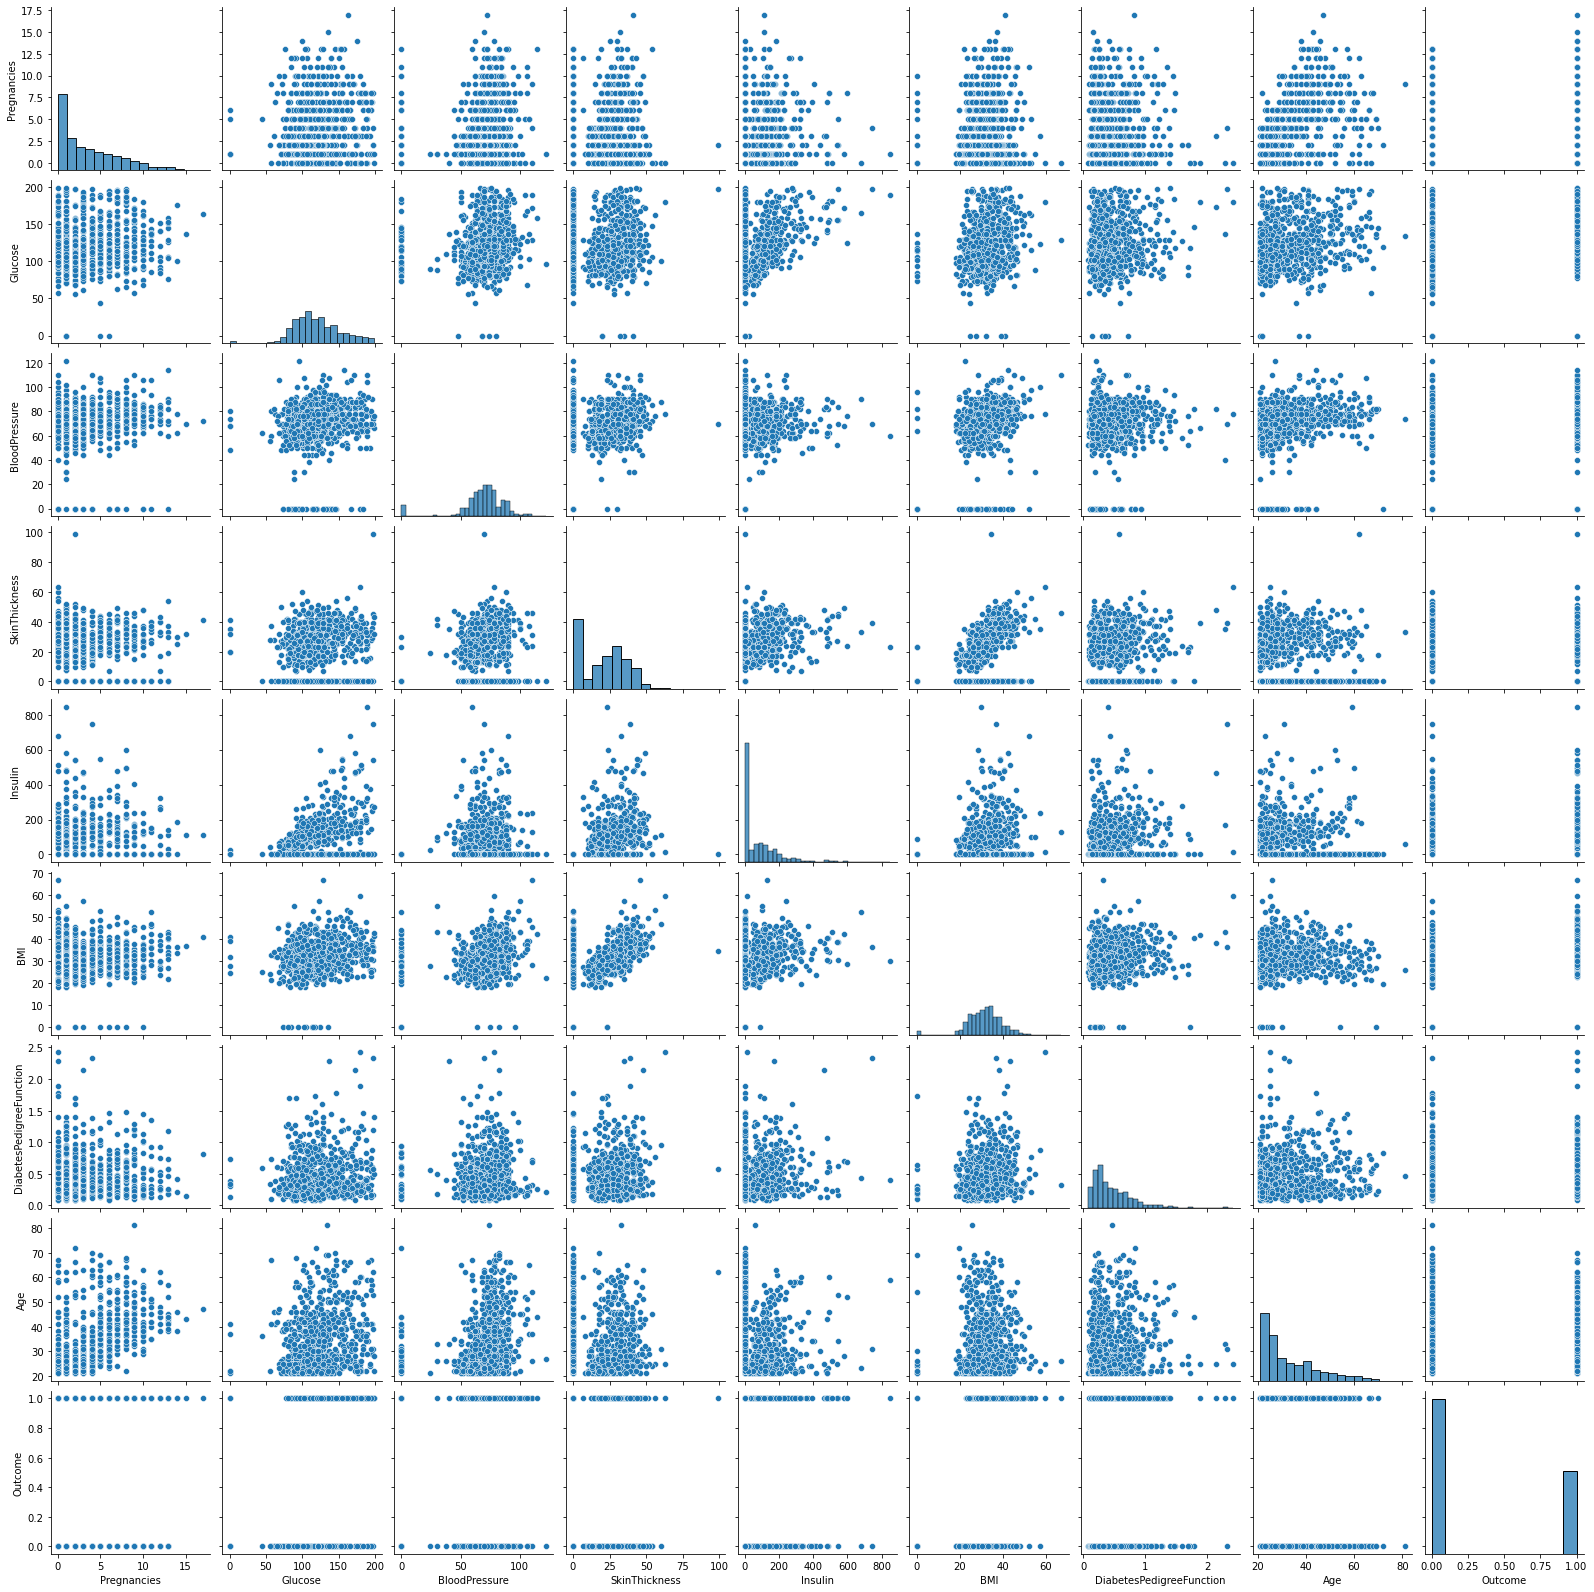

In [2]:
def open_csv_(path):
    "функция чтения"
    df = pd.read_csv(path)
    return df
df1_1 = open_csv_('data6/diabetes.csv')
sns_plot = sns.pairplot(
    df1_1)
sns_plot
    

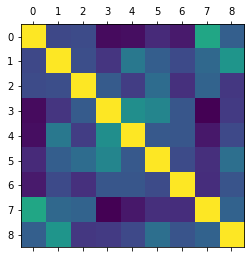

In [3]:
import matplotlib.pyplot as plt
plt.matshow(df1_1.corr())
plt.show()

Таки образом мы видим наибольшн значимую клинически корреляцию между:
диабетом и урoвнем глюкоза;
диабетом и урoвнем BMI;
Также видим корреляцию межу возрастом и номером беременности,  
А также толщина кожной складки трицепса с ИМТ, возрастом,уровнем инсулина и глюкозы

In [4]:
corr = df1_1.corr()
corr.style.background_gradient(cmap='coolwarm')

# ↑↑↑↑ Артельнативный вариант в числовом выражении ↑↑↑↑↑


# Открываю второй датасет. Считаю невозможным соединять пациентов по клин параметрам, так как нет достоверных сведений, что это одни и те же люди. 

In [5]:
df2_1 = open_csv_('data6/train.csv')
df2_2 = open_csv_('data6/test.csv')
df2 = pd.concat([df2_1,df2_2])
df1_1['sex'] = 'F'
df2 = df2.rename(columns={'age':'Age','Dia BP':'BloodPressure','glucose':'Glucose','diabetes':'Outcome',})
df_1i2 = pd.concat([df1_1, df2], ignore_index=True, sort=False)

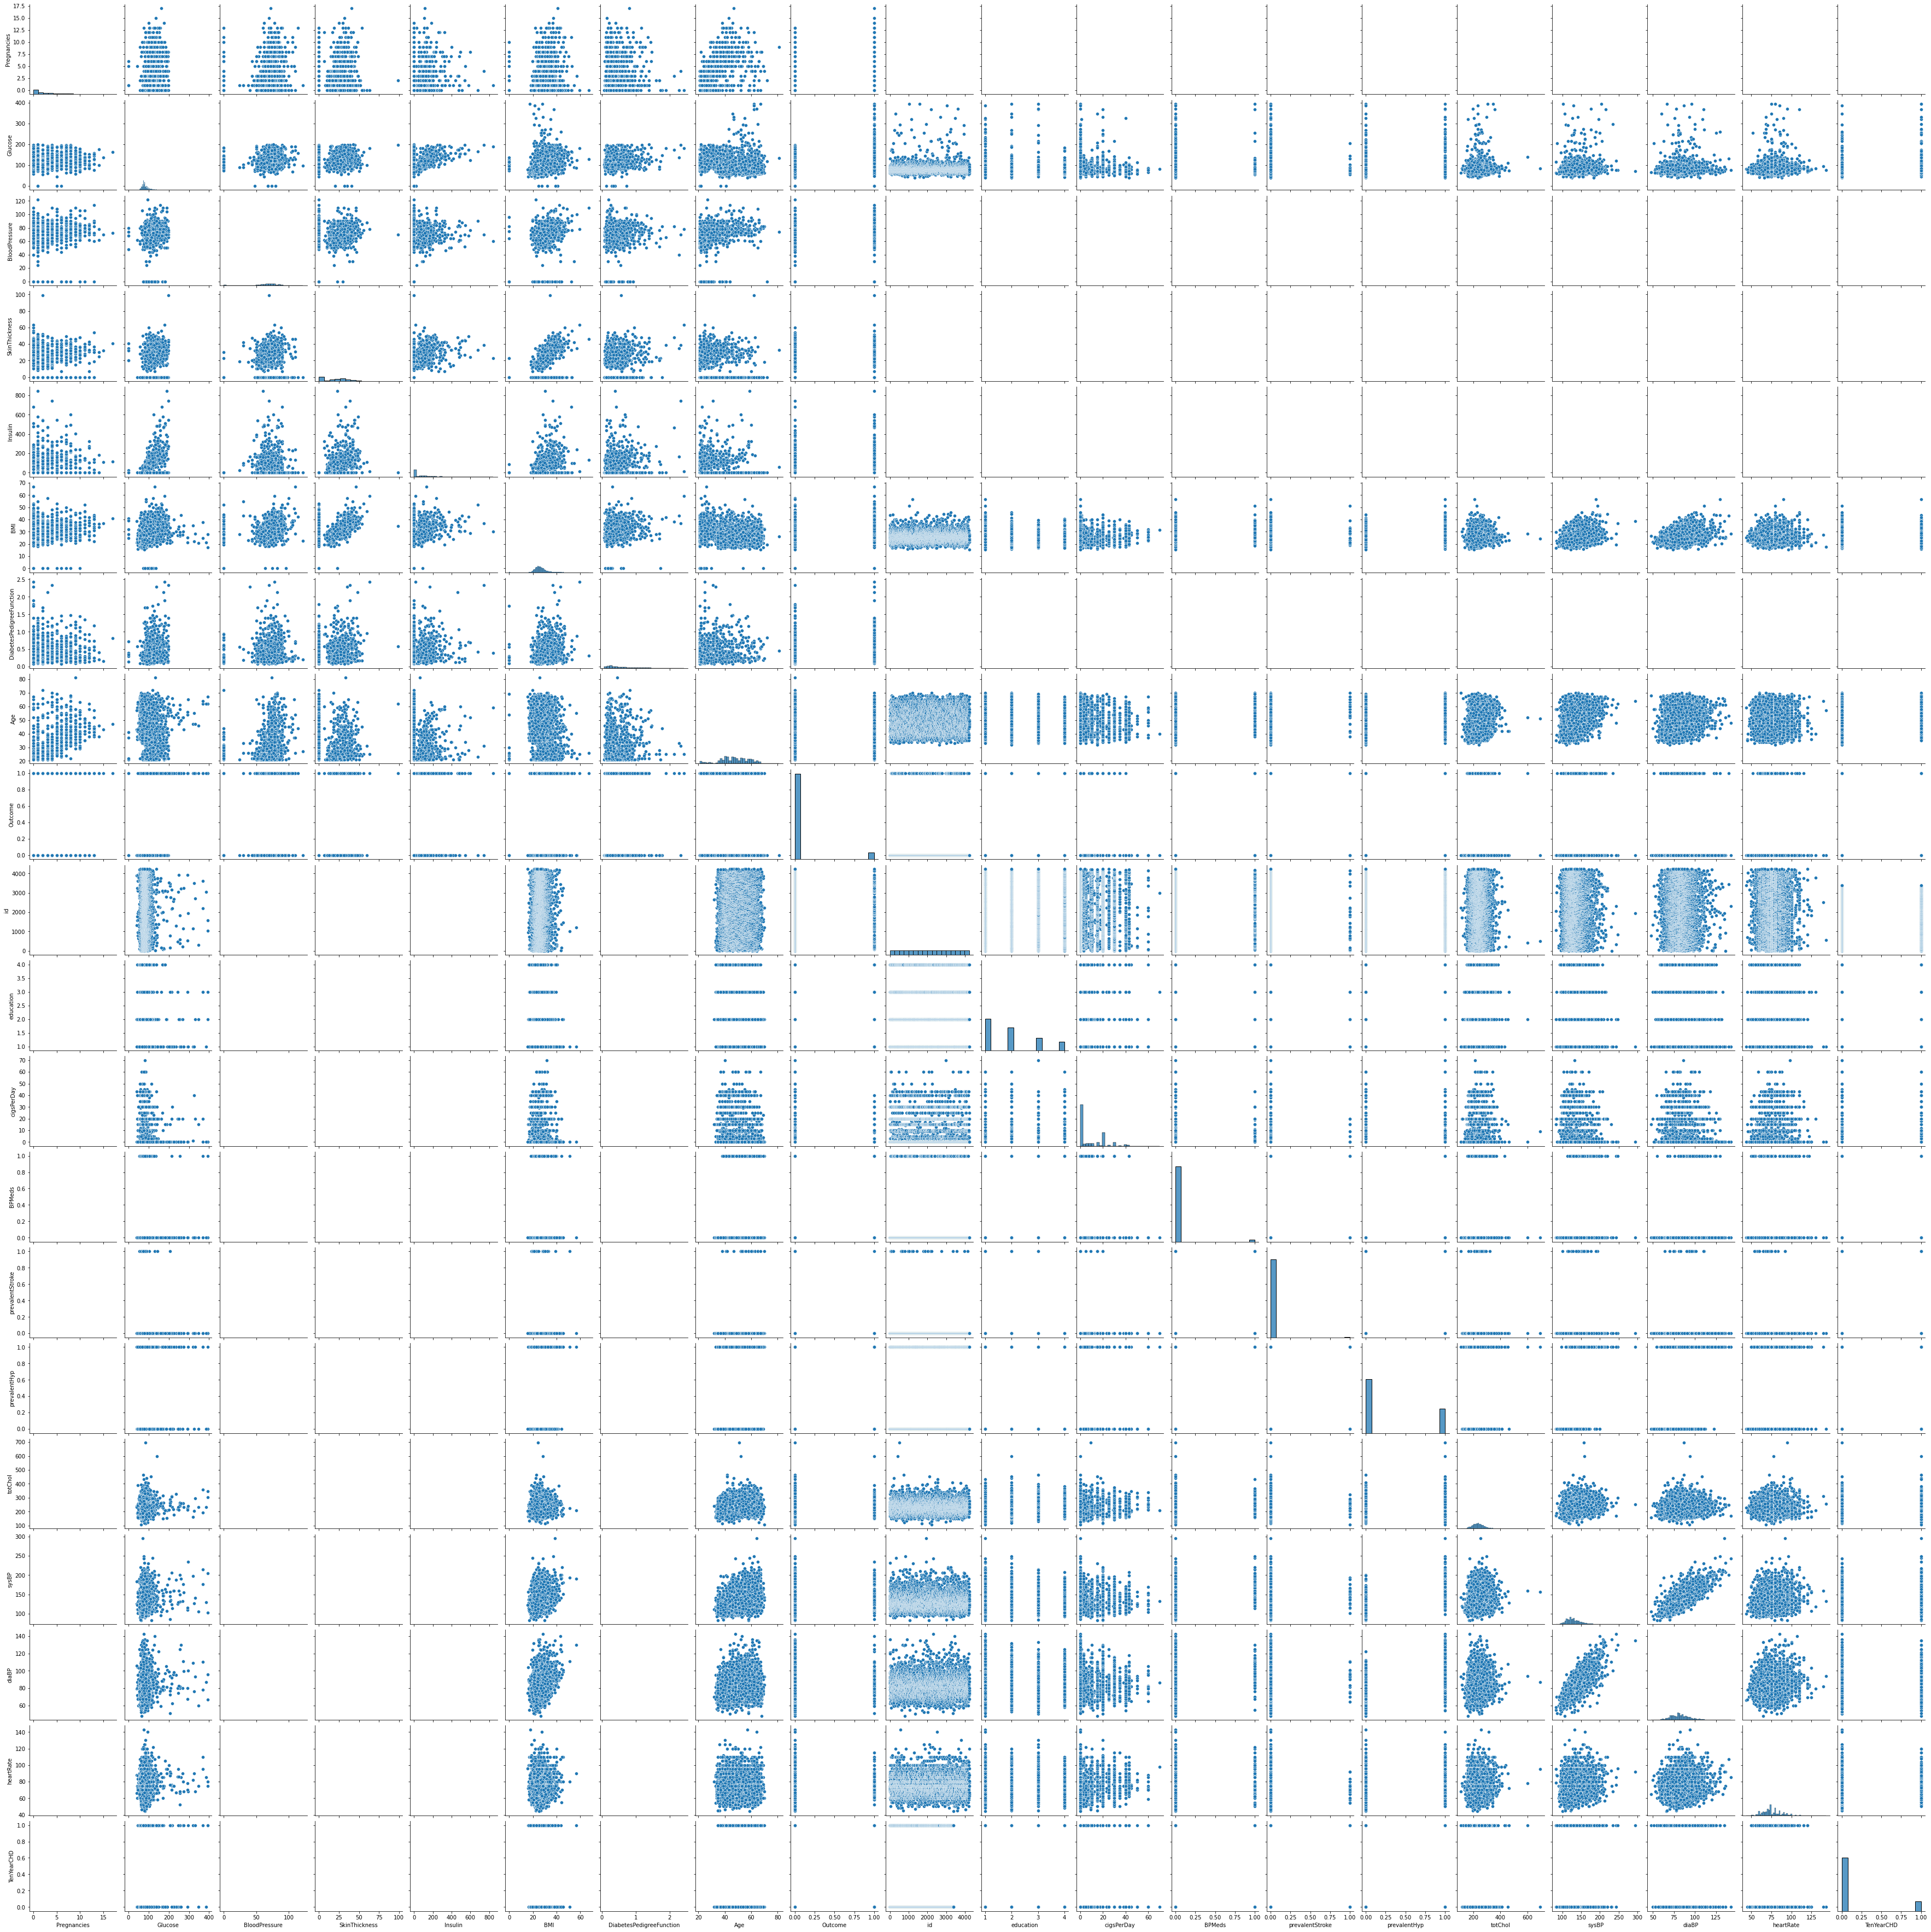

In [6]:
sns_plot = sns.pairplot(
    df_1i2)
sns_plot
    

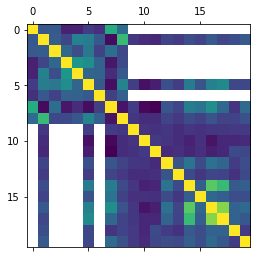

In [7]:
plt.matshow(df_1i2.corr())
plt.show()

In [8]:
corr = df_1i2.corr()
corr.style.background_gradient(cmap='coolwarm')

В обновлённых данных можно определить значимую корреляцию между диабетом и:
- Уровнем глюкозы,
- ИМТ,
- Количеством беременностей.

# Можно было бы определить связанность диабета с полом, однако в первом датасете были одни женщины, поэтому совокупная выборка нерепрезентативна

In [12]:
df3 = open_csv_('data6/diabetes_012_health_indicators_BRFSS2015.csv')
# ДИАСТОЛИЧЕСКОЕ НЕ РАССМАТРИВАЮ. 
df_1i2['HighBP'] = np.where(df_1i2['sysBP'] > 130, 1, 0)
df3 = df3.rename(columns={'Smoker':'is_smoking','Stroke':'prevalentStroke','glucose':'Glucose','diabetes':'Outcome',})
df_1i2i3 = pd.concat([df_1i2, df3], ignore_index=True, sort=False)

In [13]:
corr = df_1i2i3.corr()
corr.style.background_gradient(cmap='coolwarm')

# Данная таблица лишь подтвердила наши гипотезы